In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# prompt: In the above code use data(1) folder to define train dataloader etc You must
# resize the images to a size of 224 x 224.

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Load the pre-trained VGG19 model
model = models.vgg19(pretrained=True)

# Freeze all layers except the classification layer
for param in model.parameters():
    param.requires_grad = False

# Modify the classification layer
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, 5)  # Assuming 5 classes

# Define the device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters())

# Define the transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Load the datasets
data_dir = '/content/drive/MyDrive/Data/Data'  # Replace with the actual path to your data folder
image_datasets = {x: ImageFolder(root=data_dir + '/' + x, transform=data_transforms[x])
                  for x in ['train', 'val', 'test']}

# Create data loaders
dataloaders = {x: DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4)
              for x in ['train', 'val', 'test']}

# Training loop
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

    return model

# Train the model
model = train_model(model, dataloaders, criterion, optimizer, num_epochs=25)

# Evaluate on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in dataloaders['test']:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy: {} %'.format(100 * correct / total))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:05<00:00, 114MB/s]


Epoch 0/24
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


train Loss: 0.3512 Acc: 0.8680
val Loss: 0.0555 Acc: 1.0000
Epoch 1/24
----------
train Loss: 0.0442 Acc: 0.9880
val Loss: 0.0426 Acc: 0.9800
Epoch 2/24
----------
train Loss: 0.0261 Acc: 0.9920
val Loss: 0.0391 Acc: 0.9800
Epoch 3/24
----------
train Loss: 0.0193 Acc: 0.9960
val Loss: 0.0274 Acc: 1.0000
Epoch 4/24
----------
train Loss: 0.0111 Acc: 1.0000
val Loss: 0.0282 Acc: 0.9800
Epoch 5/24
----------
train Loss: 0.0060 Acc: 1.0000
val Loss: 0.0190 Acc: 1.0000
Epoch 6/24
----------
train Loss: 0.0070 Acc: 1.0000
val Loss: 0.0124 Acc: 1.0000
Epoch 7/24
----------
train Loss: 0.0039 Acc: 1.0000
val Loss: 0.0122 Acc: 1.0000
Epoch 8/24
----------
train Loss: 0.0032 Acc: 1.0000
val Loss: 0.0140 Acc: 1.0000
Epoch 9/24
----------
train Loss: 0.0021 Acc: 1.0000
val Loss: 0.0139 Acc: 1.0000
Epoch 10/24
----------
train Loss: 0.0027 Acc: 1.0000
val Loss: 0.0121 Acc: 1.0000
Epoch 11/24
----------
train Loss: 0.0018 Acc: 1.0000
val Loss: 0.0180 Acc: 1.0000
Epoch 12/24
----------
train Loss: 0

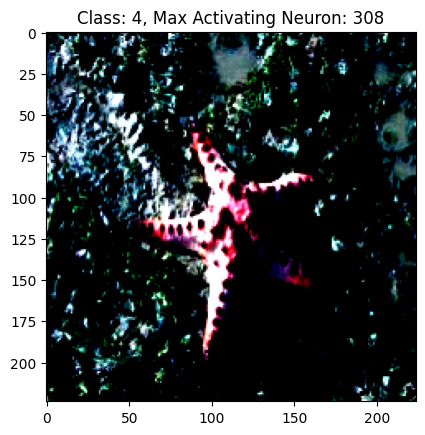

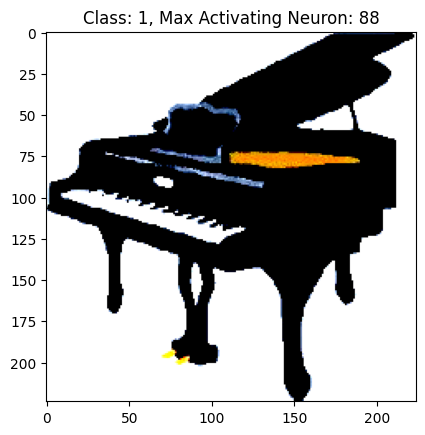

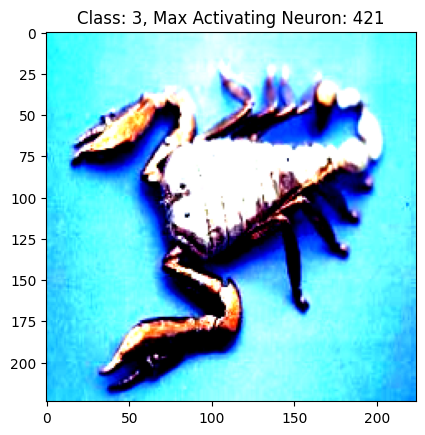

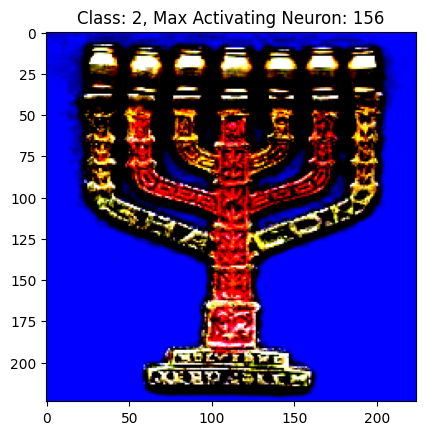

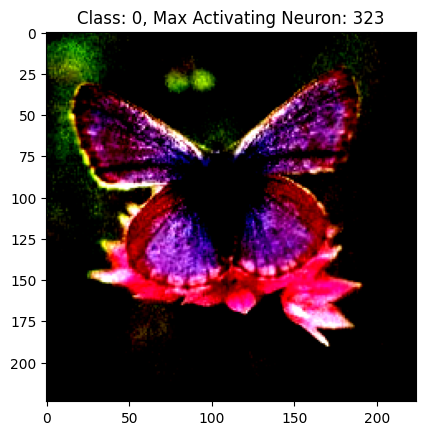

In [3]:
# prompt:  Consider one image from the training set of each of the classes (same
# images as in Task 2 ). Pass each image to CNN. Find out a neuron in the
# last convolutional layer (for each image) that is maximally activated. Trace
# back to the patch in the image which causes these neurons to fire.
# Visualize the patches in each of the images which maximally activate that
# neuron.

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# ... (previous code remains the same) ...

# ... (previous code remains the same) ...

def find_max_activating_patches(model, dataloaders):
    """
    Finds the patches in images that maximally activate neurons in the last convolutional layer.
    """
    # Get the last convolutional layer
    last_conv_layer = model.features[34]  # Assuming VGG19

    # Register a hook to get the output of the last convolutional layer
    def hook_fn(module, input, output):
        global feature_maps
        feature_maps = output.detach()

    handle = last_conv_layer.register_forward_hook(hook_fn)

    # Get one image from each class in the training set
    images_per_class = {}
    for i, (inputs, labels) in enumerate(dataloaders['train']):
        for j in range(len(labels)):
            if labels[j].item() not in images_per_class:
                images_per_class[labels[j].item()] = inputs[j].unsqueeze(0)
        if len(images_per_class) == 5:  # Assuming 5 classes
            break

    # Find the maximally activating neuron and patch for each image
    for class_id, image in images_per_class.items():
        image = image.to(device)
        _ = model(image)  # Forward pass to get feature maps

        # Find the neuron with the maximum activation
        # Changed from dim=1 to dim=0 to iterate over the correct dimension of the tensor
        max_activation_index = torch.argmax(feature_maps[0].view(feature_maps[0].size(0), -1), dim=0)
        max_activation_neuron = max_activation_index[0].item()

        # Get the corresponding patch in the image
        max_activation_value = feature_maps[0][max_activation_neuron].detach().cpu().numpy()
        max_activation_patch = image[0, :, :, :].detach().cpu().numpy().transpose(1, 2, 0)

        # Visualize the patch
        plt.figure()
        plt.imshow(max_activation_patch)
        plt.title(f"Class: {class_id}, Max Activating Neuron: {max_activation_neuron}")
        plt.show()

    handle.remove()  # Remove the hook

# Call the function to find and visualize the patches
find_max_activating_patches(model, dataloaders)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


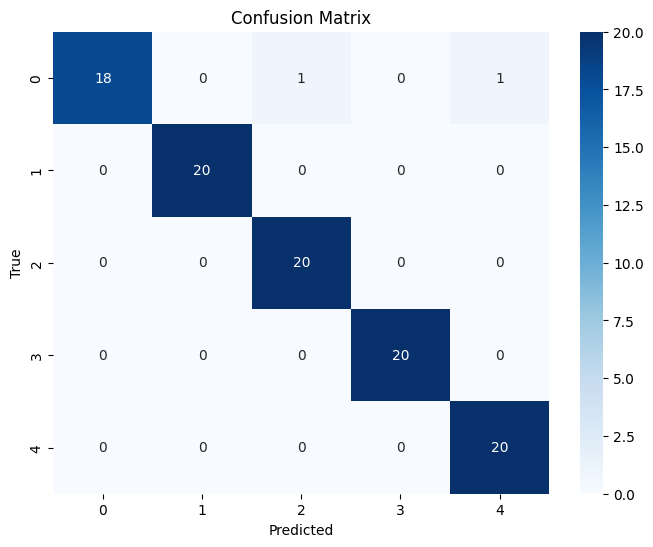

In [4]:
# prompt: generate cinfusion matrix of test results

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (previous code remains the same) ...

# Evaluate on the test set and collect predictions and true labels
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in dataloaders['test']:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
